___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np                                                   #importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [112]:
#pip install tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')                 #datayı okutuyorum, rownumber index olsun
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
df.shape

(10000, 13)

In [10]:
df.isnull().sum().any()                #null kontrolü

False

In [11]:
df.duplicated().sum()                  # duplikasyon kontrolü

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [14]:
df.Exited.value_counts()               # 1 müşteri hesabı kapalı ve 0 açık

0    7963
1    2037
Name: Exited, dtype: int64

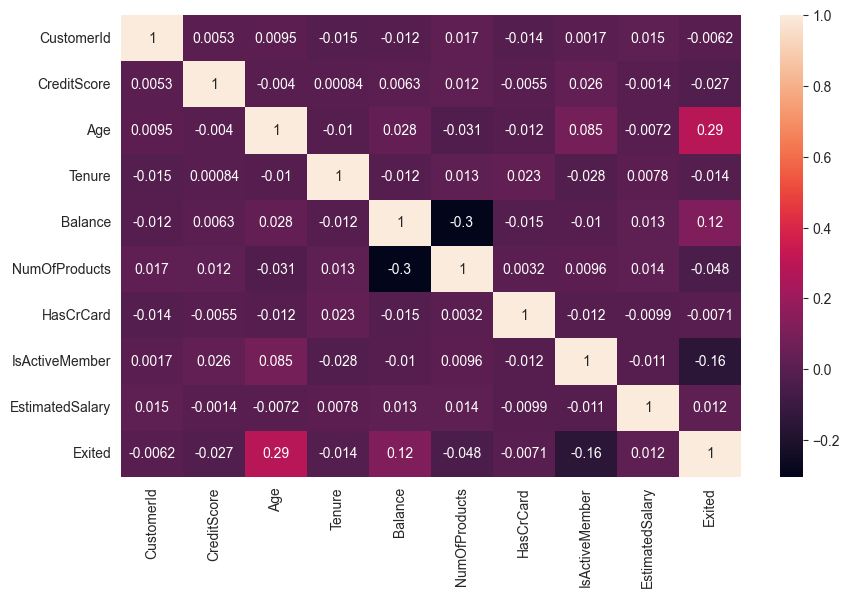

In [21]:
plt.figure(figsize=(10,6))                             # korelasyon durumu
sns.heatmap(df.corr(), annot=True);

In [22]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)      #modelin işine yaramayacak sütunları drop

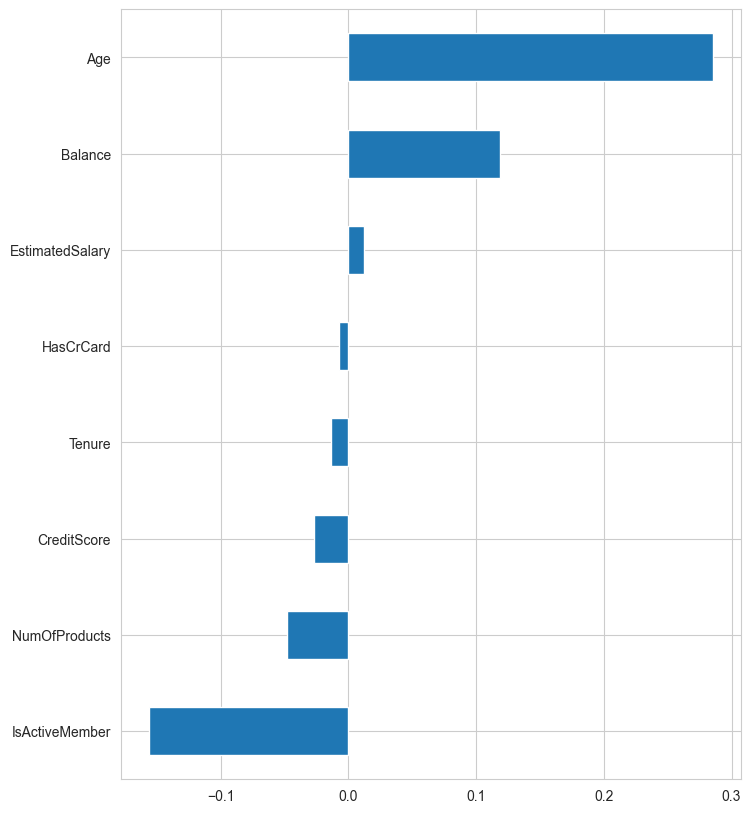

In [26]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");    #Exited sütunu ile korelasyonlarına bakıyorum

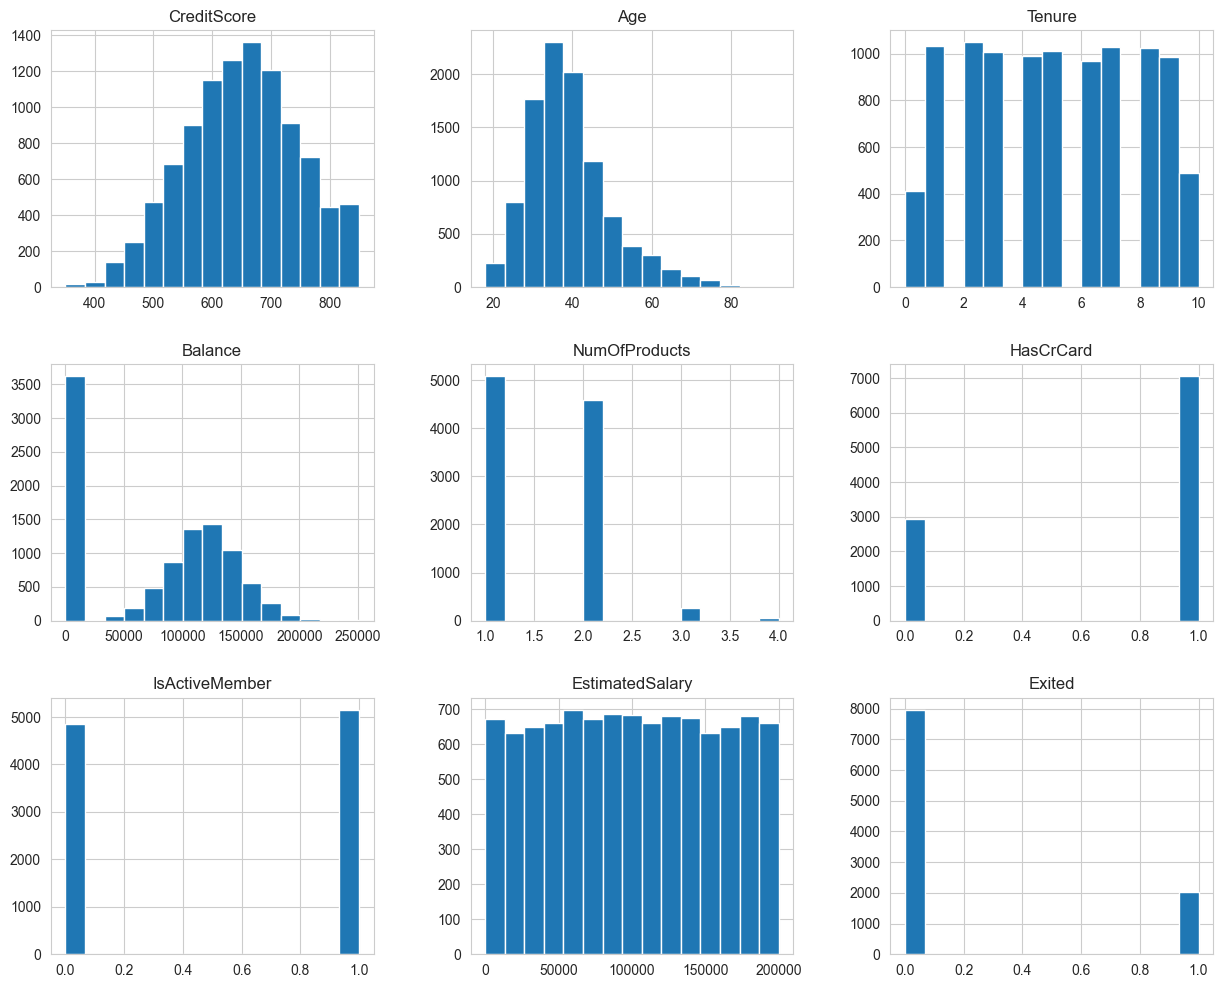

In [27]:
df.hist(figsize=(15, 12), bins=15);

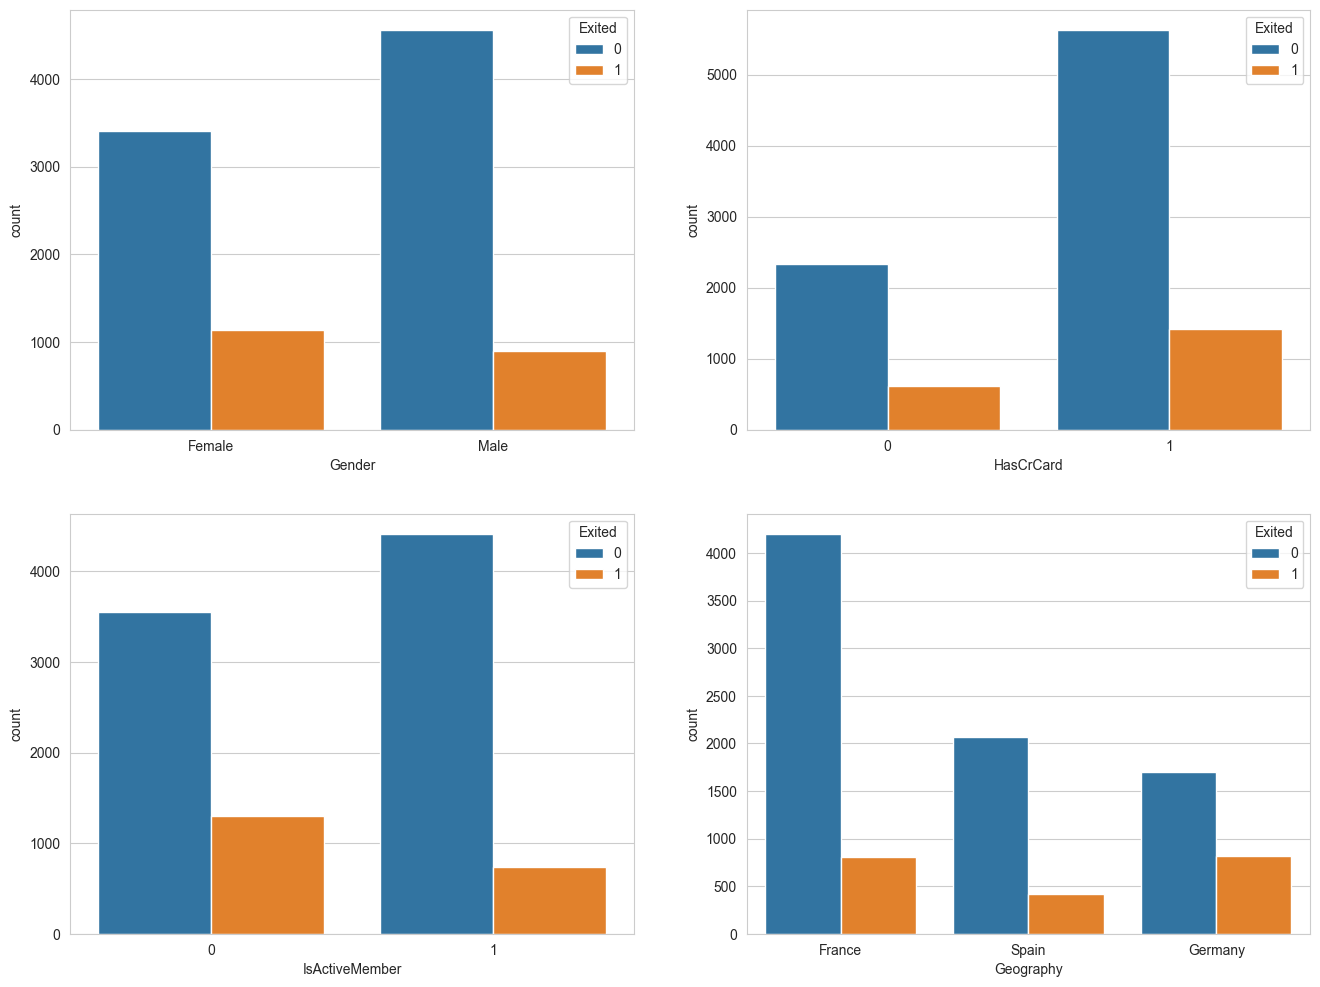

In [28]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

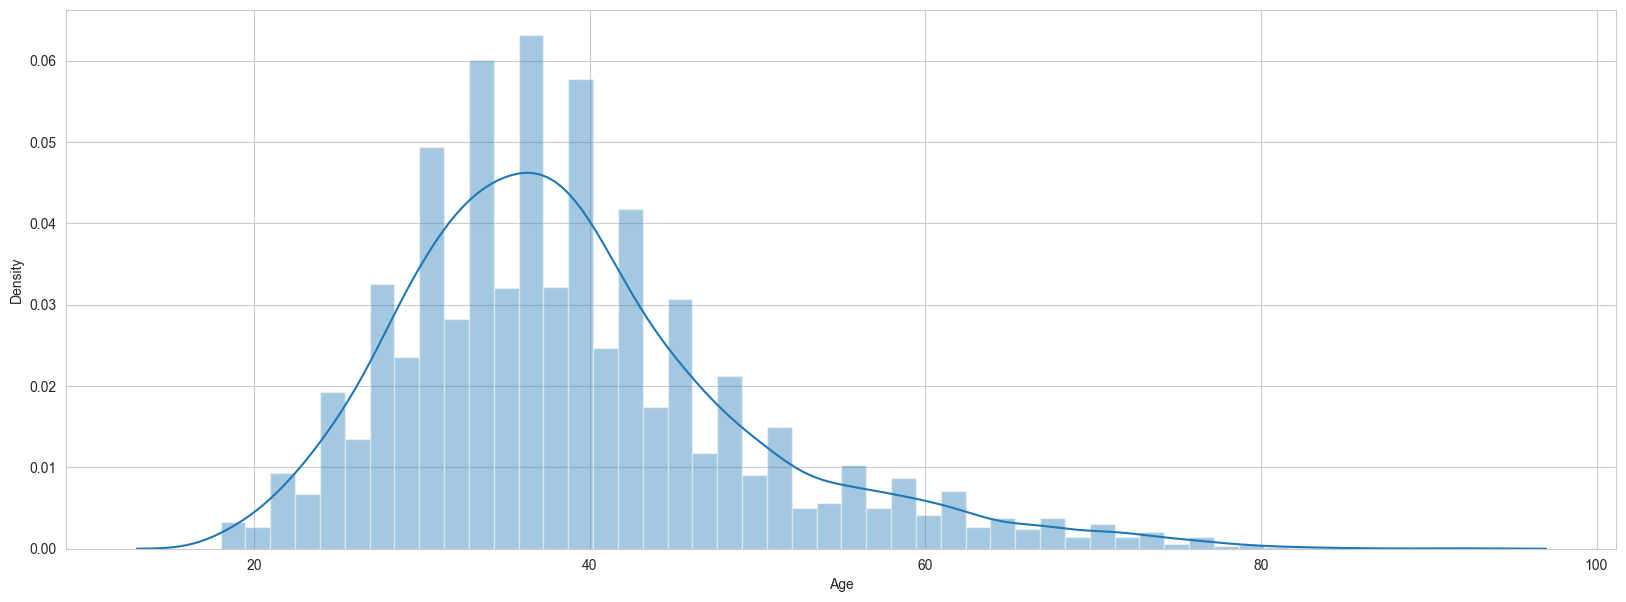

In [29]:
plt.figure(figsize=(20, 7))
sns.distplot(df.Age);

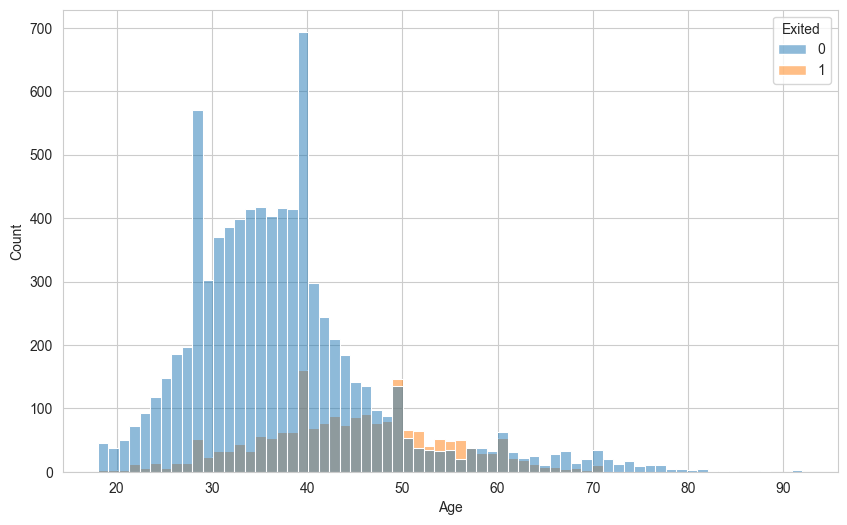

In [30]:
sns.histplot(data = df, x = "Age", hue = "Exited", fill=True);

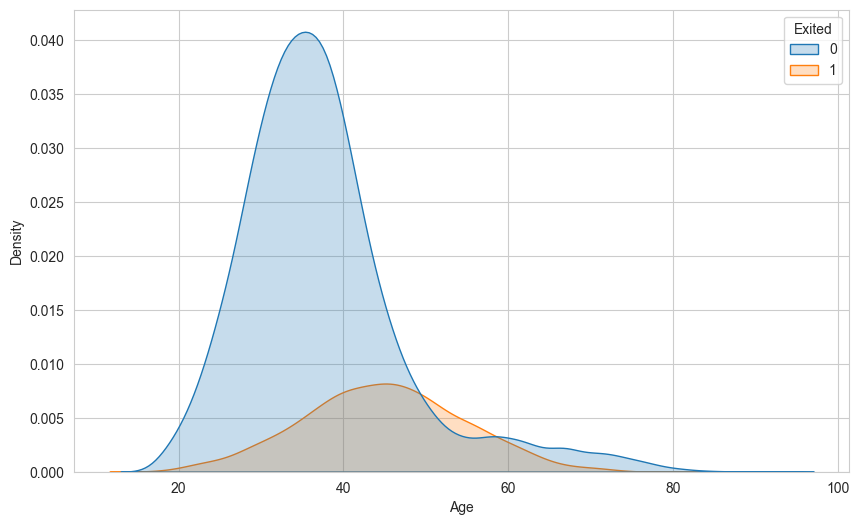

In [31]:
sns.kdeplot(data = df, x = "Age", hue = "Exited", fill=True);

<AxesSubplot: >

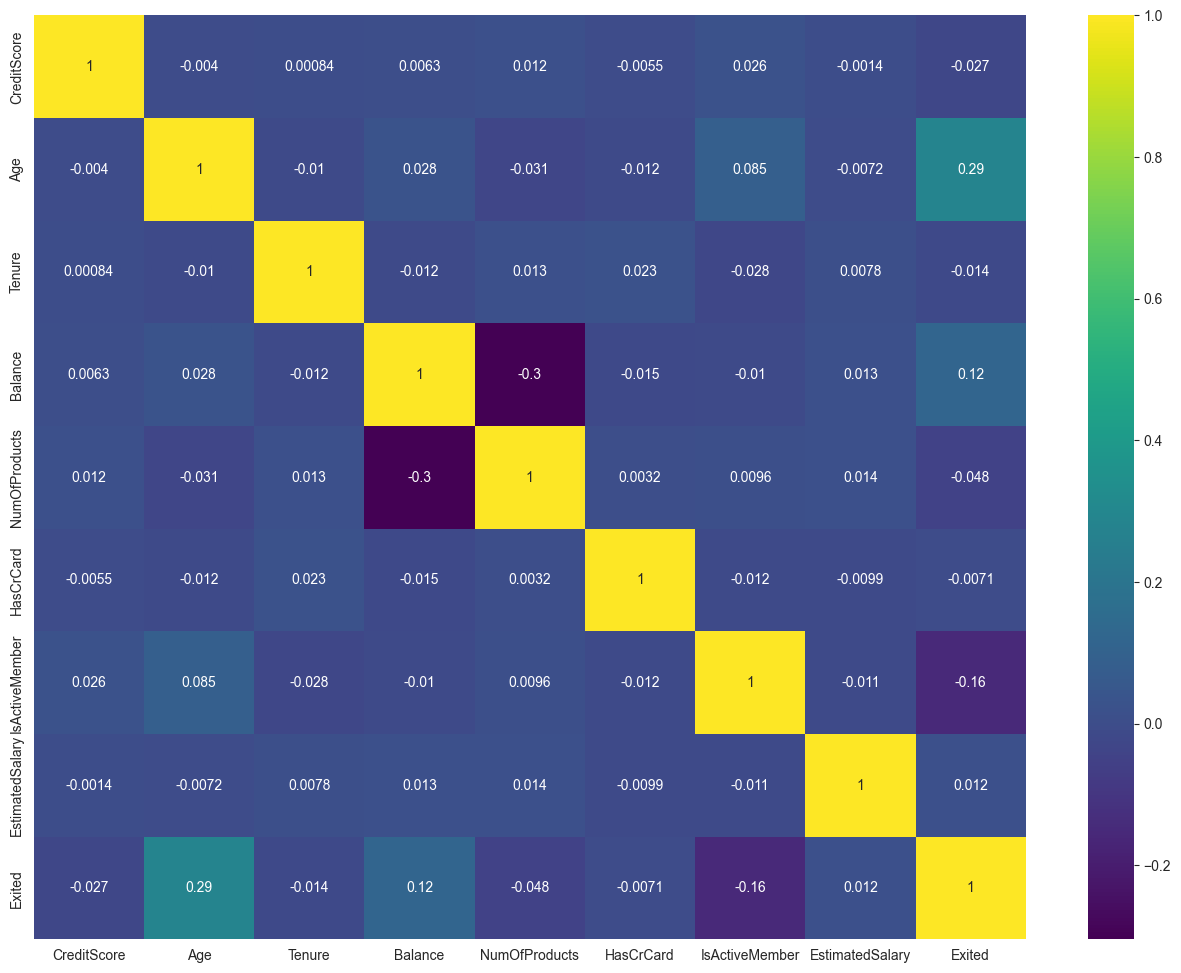

In [35]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

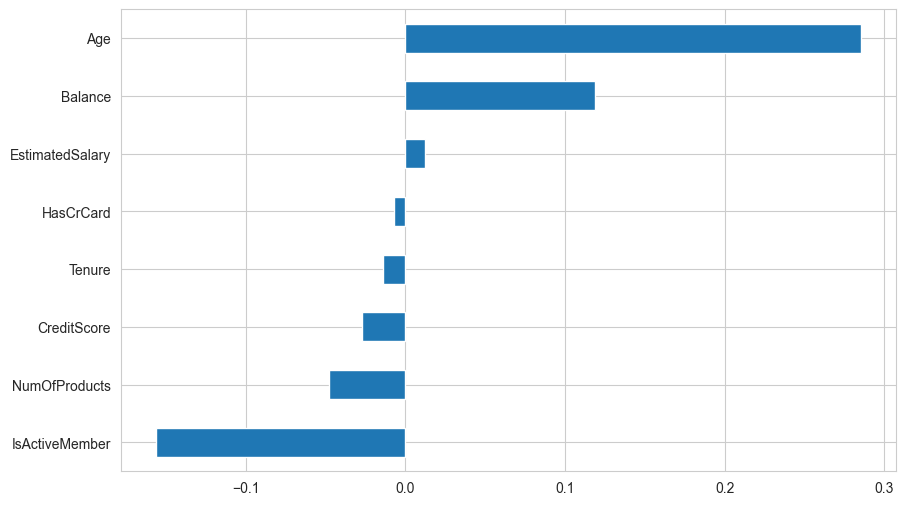

In [34]:
df.corr()['Exited'][:-1].sort_values().plot.barh();

In [36]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
2,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
3,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
4,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
5,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [38]:
seed = 42       #ortak sonuçlar için 42 aldım

In [39]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [40]:
scaler = MinMaxScaler()                   #MinMaxScaler ile scale ediyorum

In [41]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [42]:
X_train.shape

(9000, 11)

In [43]:
# import tensorflow as tf               # tensorlow u import ettim

In [44]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [45]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1)

Epoch 1/300
64/64 [==============================] - 3s 17ms/step - loss: 0.5440 - recall: 0.0000e+00 - val_loss: 0.5014 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 6ms/step - loss: 0.4962 - recall: 0.0000e+00 - val_loss: 0.4858 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4859 - recall: 0.0000e+00 - val_loss: 0.4753 - val_recall: 0.0000e+00
Epoch 4/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4778 - recall: 0.0000e+00 - val_loss: 0.4657 - val_recall: 0.0000e+00
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4692 - recall: 0.0000e+00 - val_loss: 0.4539 - val_recall: 0.0000e+00
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.4607 - recall: 0.0048 - val_loss: 0.4441 - val_recall: 0.0055
Epoch 7/300
64/64 [==============================] - 0s 6ms/step - loss: 0.4542 - recall: 0.0369 - val_loss: 0.4360 - val_recall: 0.1215


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [47]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.544,0.000,0.501,0.000
1,0.496,0.000,0.486,0.000
2,0.486,0.000,0.475,0.000
3,0.478,0.000,0.466,0.000
4,0.469,0.000,0.454,0.000


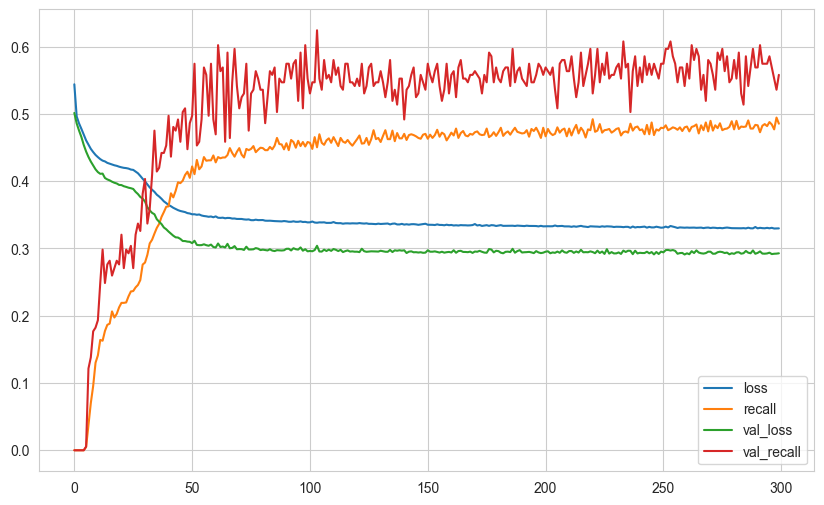

In [48]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [49]:
y_pred = model.predict(X_test) > 0.5                             # sonuçları değerlendiriyorum
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[765  31]
 [107  97]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       796
           1       0.76      0.48      0.58       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



32/32 [==============================] - 0s 2ms/step


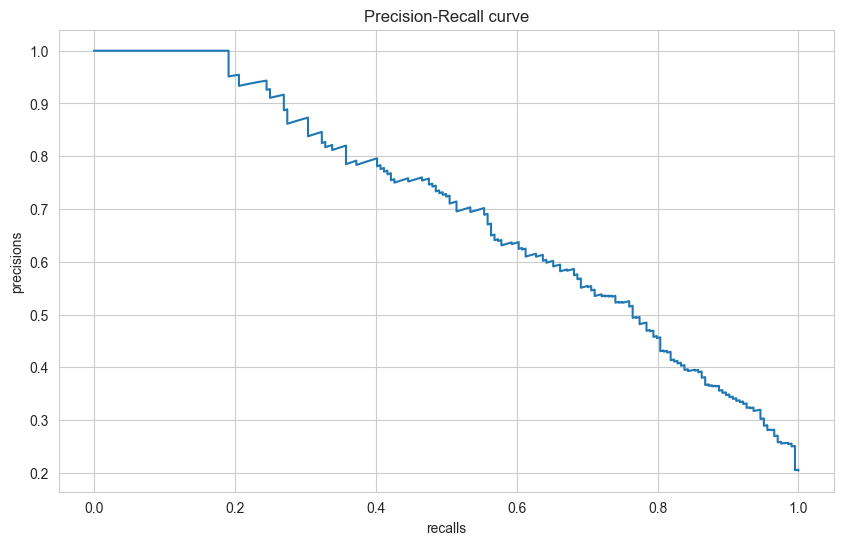

In [50]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [51]:
average_precision_score(y_test, y_pred_proba)

0.6959041279723142

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [53]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [54]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [55]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 15ms/step - loss: 0.6899 - recall: 0.4370 - val_loss: 0.6754 - val_recall: 0.5856
Epoch 2/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6674 - recall: 0.6362 - val_loss: 0.6331 - val_recall: 0.6519
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6448 - recall: 0.6616 - val_loss: 0.6044 - val_recall: 0.6740
Epoch 4/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6265 - recall: 0.6798 - val_loss: 0.5699 - val_recall: 0.6630
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6151 - recall: 0.6798 - val_loss: 0.6174 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6060 - recall: 0.7004 - val_loss: 0.5509 - val_recall: 0.6685
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6000 - recall: 0.6834 - val_loss: 0.5998 - val_recall: 0.7569
Epoch 8/300
64/64 [=====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<AxesSubplot: >

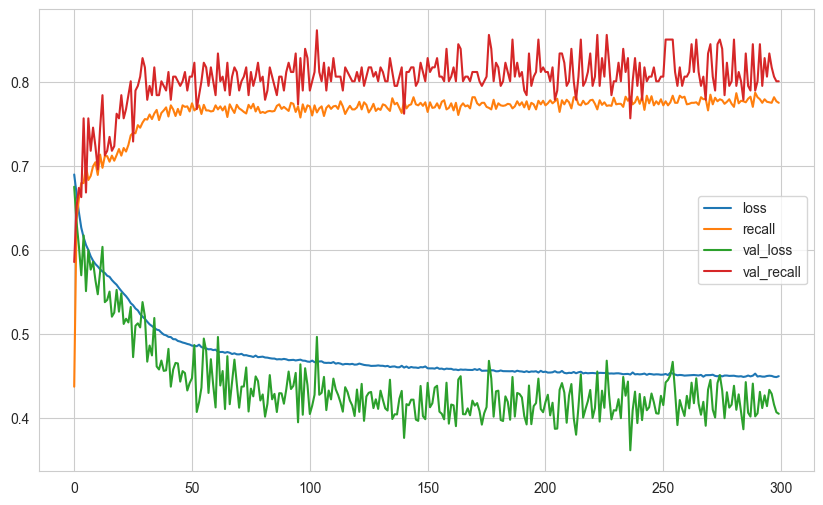

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [57]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[622 174]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.48      0.77      0.59       204

    accuracy                           0.78      1000
   macro avg       0.70      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



32/32 [==============================] - 0s 2ms/step


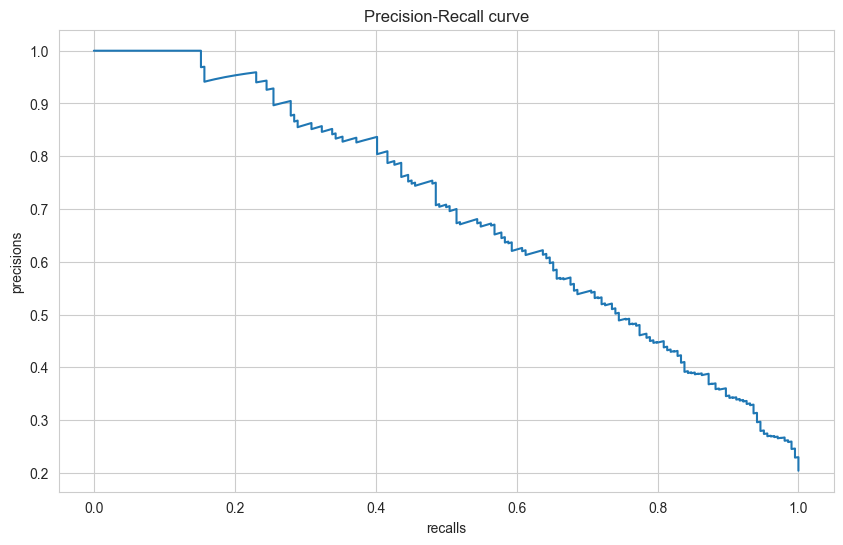

In [58]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [59]:
average_precision_score(y_test, y_pred_proba)

0.6947072153220206

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [60]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [61]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 12ms/step - loss: 0.6718 - recall: 0.5442 - val_loss: 0.6411 - val_recall: 0.6519
Epoch 2/300
64/64 [==============================] - 0s 6ms/step - loss: 0.6239 - recall: 0.6392 - val_loss: 0.6238 - val_recall: 0.7901
Epoch 3/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5899 - recall: 0.6895 - val_loss: 0.5609 - val_recall: 0.7735
Epoch 4/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5477 - recall: 0.7094 - val_loss: 0.5389 - val_recall: 0.8066
Epoch 5/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5265 - recall: 0.7258 - val_loss: 0.4300 - val_recall: 0.7238
Epoch 6/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5105 - recall: 0.7403 - val_loss: 0.4158 - val_recall: 0.7238
Epoch 7/300
64/64 [==============================] - 0s 6ms/step - loss: 0.5014 - recall: 0.7379 - val_loss: 0.4416 - val_recall: 0.8232
Epoch 8/300
64/64 [=====================

<AxesSubplot: >

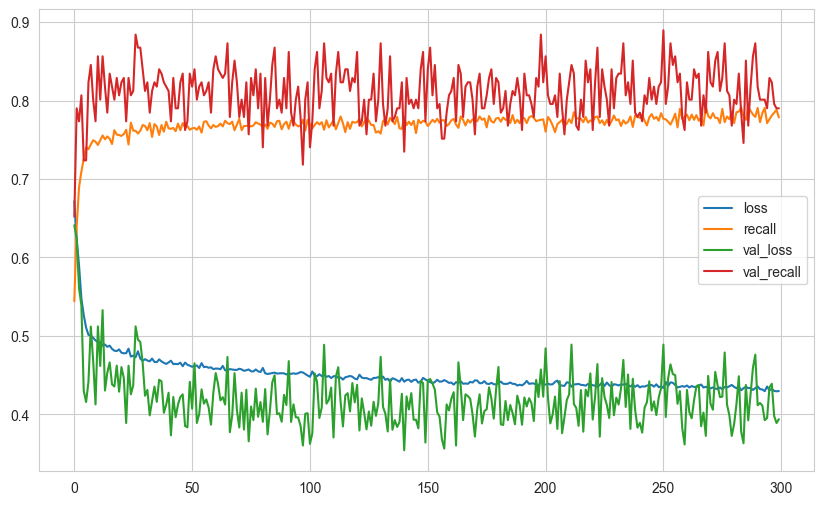

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [63]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 4ms/step
[[651 145]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.87       796
           1       0.52      0.78      0.63       204

    accuracy                           0.81      1000
   macro avg       0.73      0.80      0.75      1000
weighted avg       0.85      0.81      0.82      1000



### Add Dropout Layer

In [64]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [65]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 14ms/step - loss: 0.7151 - recall: 0.4891 - val_loss: 0.6922 - val_recall: 0.5912
Epoch 2/300
64/64 [==============================] - 1s 16ms/step - loss: 0.6925 - recall: 0.5236 - val_loss: 0.6789 - val_recall: 0.6575
Epoch 3/300
64/64 [==============================] - 1s 11ms/step - loss: 0.6802 - recall: 0.5781 - val_loss: 0.6625 - val_recall: 0.6519
Epoch 4/300
64/64 [==============================] - 1s 9ms/step - loss: 0.6668 - recall: 0.5969 - val_loss: 0.6500 - val_recall: 0.6796
Epoch 5/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6570 - recall: 0.5672 - val_loss: 0.6531 - val_recall: 0.7569
Epoch 6/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6509 - recall: 0.6041 - val_loss: 0.6172 - val_recall: 0.6685
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.6449 - recall: 0.6096 - val_loss: 0.6322 - val_recall: 0.7569
Epoch 8/300
64/64 [===================

<AxesSubplot: >

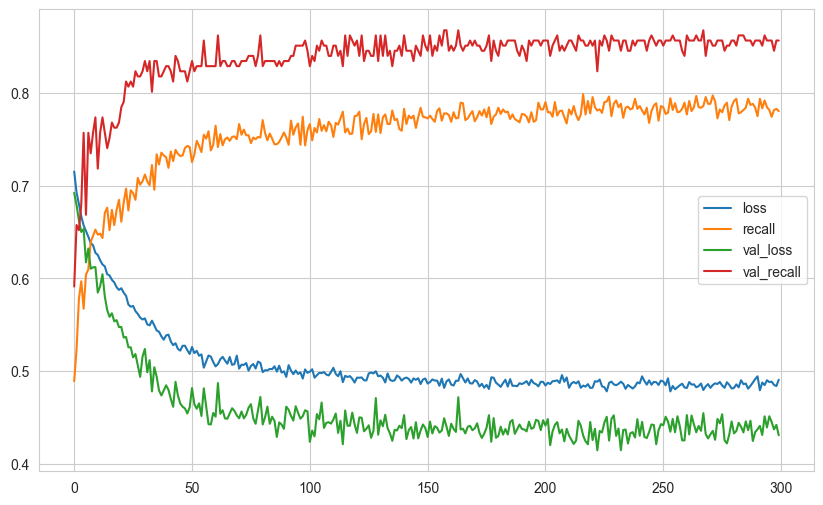

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [67]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 10ms/step
[[599 197]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       796
           1       0.45      0.78      0.57       204

    accuracy                           0.76      1000
   macro avg       0.69      0.77      0.70      1000
weighted avg       0.83      0.76      0.78      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [68]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

#### Monitor the "val_recall" as metric

In [69]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [70]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 19ms/step - loss: 0.6795 - recall: 0.5835 - val_loss: 0.6417 - val_recall: 0.6133
Epoch 2/300
64/64 [==============================] - 1s 9ms/step - loss: 0.6342 - recall: 0.5944 - val_loss: 0.5951 - val_recall: 0.6354
Epoch 3/300
64/64 [==============================] - 1s 10ms/step - loss: 0.6192 - recall: 0.6059 - val_loss: 0.5718 - val_recall: 0.6796
Epoch 4/300
64/64 [==============================] - 1s 8ms/step - loss: 0.6046 - recall: 0.6453 - val_loss: 0.5525 - val_recall: 0.6851
Epoch 5/300
64/64 [==============================] - 1s 9ms/step - loss: 0.5981 - recall: 0.6501 - val_loss: 0.5483 - val_recall: 0.6796
Epoch 6/300
64/64 [==============================] - 1s 8ms/step - loss: 0.5833 - recall: 0.6816 - val_loss: 0.4891 - val_recall: 0.6519
Epoch 7/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5750 - recall: 0.6707 - val_loss: 0.5707 - val_recall: 0.7845
Epoch 8/300
64/64 [====================

<AxesSubplot: >

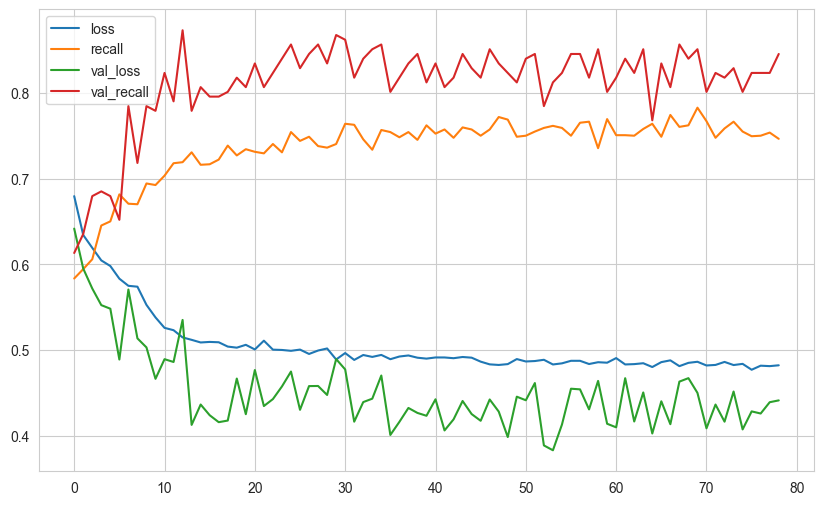

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 5ms/step
[[638 158]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       796
           1       0.48      0.72      0.57       204

    accuracy                           0.78      1000
   macro avg       0.70      0.76      0.72      1000
weighted avg       0.83      0.78      0.80      1000



#### Monitor the "val_recall" as metric

In [73]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr=0.005)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [74]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=25,
                           restore_best_weights = True)

In [75]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          callbacks=[early_stop],
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 3s 13ms/step - loss: 0.6781 - recall: 0.5085 - val_loss: 0.6160 - val_recall: 0.5083
Epoch 2/300
64/64 [==============================] - 0s 8ms/step - loss: 0.6471 - recall: 0.5878 - val_loss: 0.6072 - val_recall: 0.6685
Epoch 3/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6294 - recall: 0.6562 - val_loss: 0.5841 - val_recall: 0.6961
Epoch 4/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6168 - recall: 0.6671 - val_loss: 0.5678 - val_recall: 0.6961
Epoch 5/300
64/64 [==============================] - 0s 7ms/step - loss: 0.6005 - recall: 0.6671 - val_loss: 0.5589 - val_recall: 0.7790
Epoch 6/300
64/64 [==============================] - 0s 7ms/step - loss: 0.5698 - recall: 0.7052 - val_loss: 0.4638 - val_recall: 0.6961
Epoch 7/300
64/64 [==============================] - 0s 5ms/step - loss: 0.5553 - recall: 0.6895 - val_loss: 0.5390 - val_recall: 0.8508
Epoch 8/300
64/64 [=====================

<AxesSubplot: >

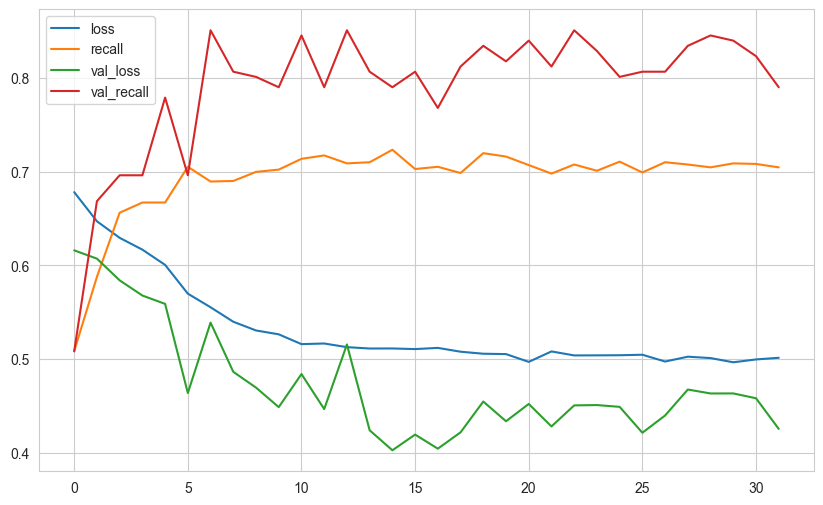

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [77]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[538 258]
 [ 45 159]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       796
           1       0.38      0.78      0.51       204

    accuracy                           0.70      1000
   macro avg       0.65      0.73      0.65      1000
weighted avg       0.81      0.70      0.73      1000



## GridSearchCV

In [78]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [79]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 16, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 8, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['Recall'])
    return classifier

In [80]:
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [81]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)

In [82]:
tf.random.set_seed(seed)
classifier = KerasClassifier(build_fn=build_classifier, validation_split = 0.1, epochs=200)

parameters = {'batch_size': [128, 256],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring='recall',
                          cv=5,
                          n_jobs=-1,
                          verbose=1)

grid_model.fit(X_train, y_train, callbacks = [early_stop], class_weight=class_weights)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Epoch 1/200
32/32 [==============================] - 3s 16ms/step - loss: 0.6673 - recall: 0.5732 - val_loss: 0.5984 - val_recall: 0.6519
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6436 - recall: 0.6192 - val_loss: 0.5891 - val_recall: 0.7127
Epoch 3/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6330 - recall: 0.6217 - val_loss: 0.5634 - val_recall: 0.7072
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6148 - recall: 0.6568 - val_loss: 0.5162 - val_recall: 0.6796
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6010 - recall: 0.6768 - val_loss: 0.5165 - val_recall: 0.7348
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 0.5781 - recall: 0.6852 - val_loss: 0.5349 - val_recall: 0.8011
Epoch 7/200
32/32 [==============================] - 0s 7ms/step - loss: 0.5647 - recall: 0.7252 - val_loss: 0.5078

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002A24351DBA0>,
             n_jobs=-1,
             param_grid={'batch_size': [128, 256],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [83]:
grid_model.best_score_

0.8456656427405465

In [84]:
grid_model.best_params_

{'batch_size': 256,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.rmsprop.RMSprop}

In [85]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[492 304]
 [ 34 170]]
              precision    recall  f1-score   support

           0       0.94      0.62      0.74       796
           1       0.36      0.83      0.50       204

    accuracy                           0.66      1000
   macro avg       0.65      0.73      0.62      1000
weighted avg       0.82      0.66      0.69      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 1s 32ms/step


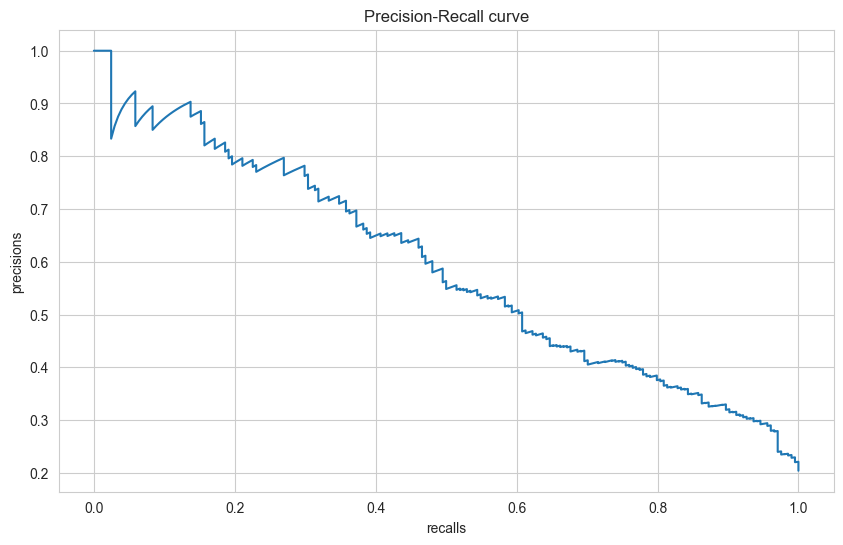

In [86]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [87]:
average_precision_score(y_test, y_pred_proba)

0.5906527198034286

# Final Model and Model Deployment

In [88]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [89]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(16, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(lr=0.005)

model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=15,
                           restore_best_weights = True)
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=128,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
71/71 [==============================] - 2s 7ms/step - loss: 0.6284 - recall: 0.6667 - val_loss: 0.5786 - val_recall: 0.6029
Epoch 2/200
71/71 [==============================] - 0s 4ms/step - loss: 0.5844 - recall: 0.6809 - val_loss: 0.5459 - val_recall: 0.6078
Epoch 3/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5590 - recall: 0.7059 - val_loss: 0.5656 - val_recall: 0.7549
Epoch 4/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5353 - recall: 0.7114 - val_loss: 0.5307 - val_recall: 0.7353
Epoch 5/200
71/71 [==============================] - 0s 3ms/step - loss: 0.5155 - recall: 0.7360 - val_loss: 0.4961 - val_recall: 0.7353
Epoch 6/200
71/71 [==============================] - 0s 5ms/step - loss: 0.5040 - recall: 0.7365 - val_loss: 0.5269 - val_recall: 0.7892
Epoch 7/200
71/71 [==============================] - 0s 3ms/step - loss: 0.4922 - recall: 0.7507 - val_loss: 0.4127 - val_recall: 0.5931
Epoch 8/200
71/71 [======================

<AxesSubplot: >

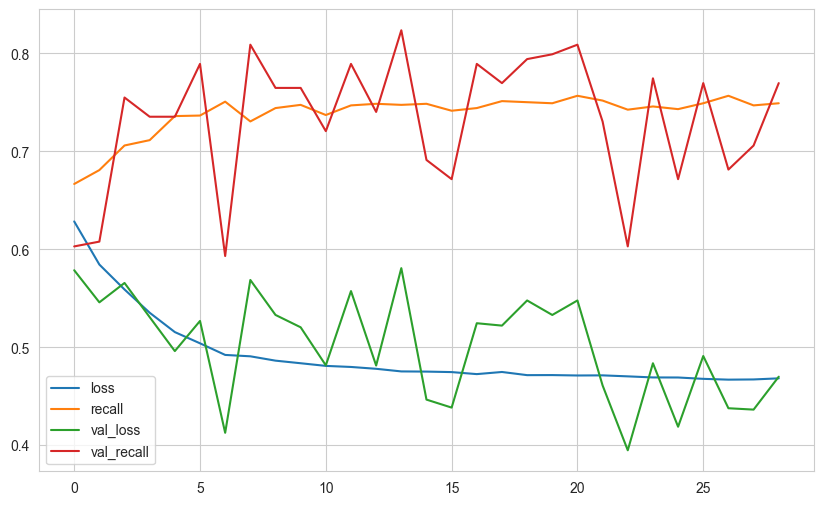

In [90]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [91]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[530 266]
 [ 36 168]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.78       796
           1       0.39      0.82      0.53       204

    accuracy                           0.70      1000
   macro avg       0.66      0.74      0.65      1000
weighted avg       0.82      0.70      0.73      1000



In [92]:
model.save('model_churn.h5')

## Prediction

In [93]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore            619.000
Age                     42.000
Tenure                   2.000
Balance                  0.000
NumOfProducts            1.000
HasCrCard                1.000
IsActiveMember           1.000
EstimatedSalary     101348.880
Geography_Germany        0.000
Geography_Spain          0.000
Gender_Male              0.000
Name: 1, dtype: float64

In [94]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 11))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 0.        , 0.        ,
        0.        ]])

In [95]:
model.predict(single_customer)

1/1 [==============================] - 0s 47ms/step


array([[0.6225509]], dtype=float32)

In [96]:
df["Exited"].iloc[0]

1

## Comparison with ML

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [100]:
clf1 = RandomForestClassifier(random_state=seed, class_weight="balanced")
clf2 = SVC(probability=True, random_state=seed, class_weight="balanced")
clf3 = LogisticRegression(random_state=seed, class_weight="balanced")

In [101]:
[10**(-2+i) for i in range(5)]

[0.01, 0.1, 1, 10, 100]

In [102]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**(-2+i) for i in range(5)]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**(-2+i) for i in range(5)]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier'] = [clf3]

In [103]:
display(param1, param2, param3)

{'classifier__n_estimators': [10, 50, 100, 250],
 'classifier__max_depth': [5, 10, 20],
 'classifier': [RandomForestClassifier(class_weight='balanced', random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier': [SVC(class_weight='balanced', probability=True, random_state=42)]}

{'classifier__C': [0.01, 0.1, 1, 10, 100],
 'classifier__penalty': ['l1', 'l2'],
 'classifier': [LogisticRegression(class_weight='balanced', random_state=42)]}

In [104]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3]

In [105]:
pipeline

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [106]:
grid_model = GridSearchCV(pipeline, params, cv=5, n_jobs=-1,
                  scoring='recall').fit(X_train, y_train)

In [107]:
grid_model.best_params_

{'classifier': RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=50,
                        random_state=42),
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50}

In [108]:
grid_model.best_score_

0.7250442965411474

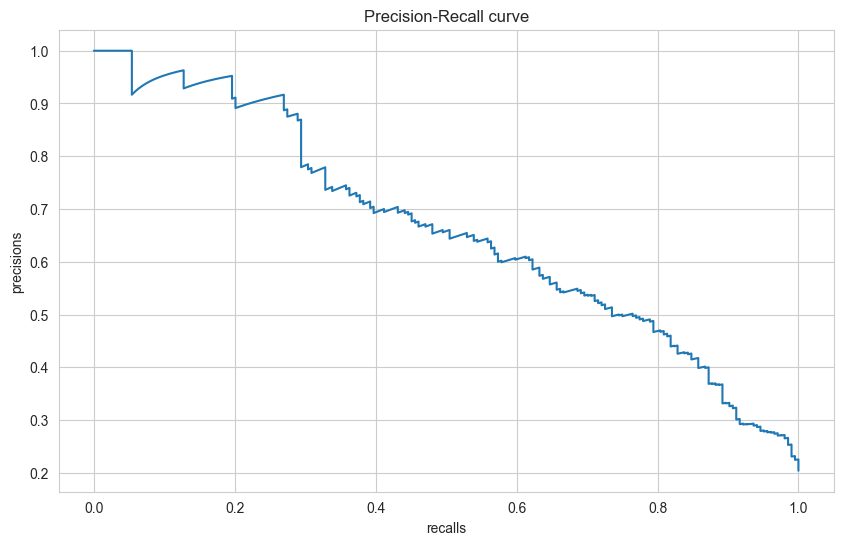

In [109]:
y_pred_proba = grid_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='RF')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [110]:
average_precision_score(y_test, y_pred_proba)

0.6635759012236955

In [111]:
y_pred = grid_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[644 152]
 [ 53 151]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       796
           1       0.50      0.74      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.77      0.73      1000
weighted avg       0.84      0.80      0.81      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___